# Import Functions

In [1]:
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

# Read in Dataset

In [2]:
ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Gridcell_Averaged_Files/PREFIRE_1B-RAD_Gridded_and_Masked_2024_07.nc")
ds

<xarray.Dataset>
Dimensions:                (time: 1, xtrack: 8, spectral: 63, sfc_type: 9,
                            lat: 168, lon: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2024-07-31
Dimensions without coordinates: xtrack, spectral, sfc_type, lat, lon
Data variables:
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    spectral_BT            (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    longitude              (time, lat, lon) float64 ...
    latitude               (time, lat, lon) float64 ...
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...

# Basic Plotting with Xarray

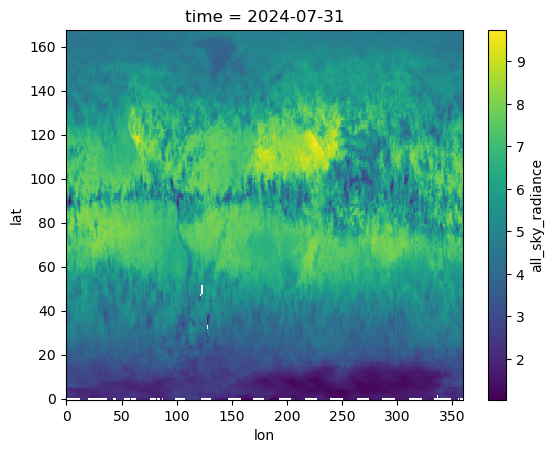

In [3]:
ds["all_sky_radiance"].mean(dim=['xtrack','sfc_type']).sel(spectral=9).plot()

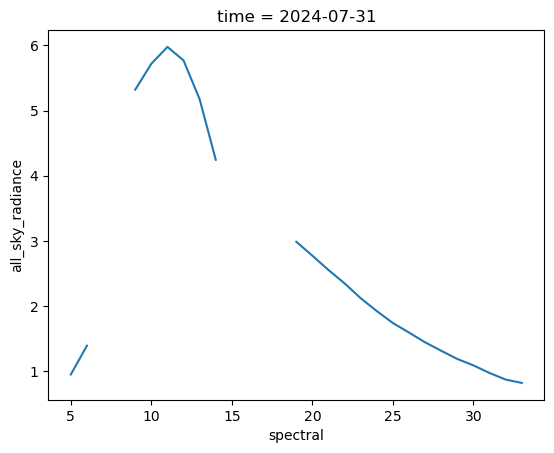

In [4]:
ds["all_sky_radiance"].mean(dim=['xtrack','sfc_type','lat','lon']).plot()

# Global Plots of Channel 10 and Channel 23

## * All-Sky 

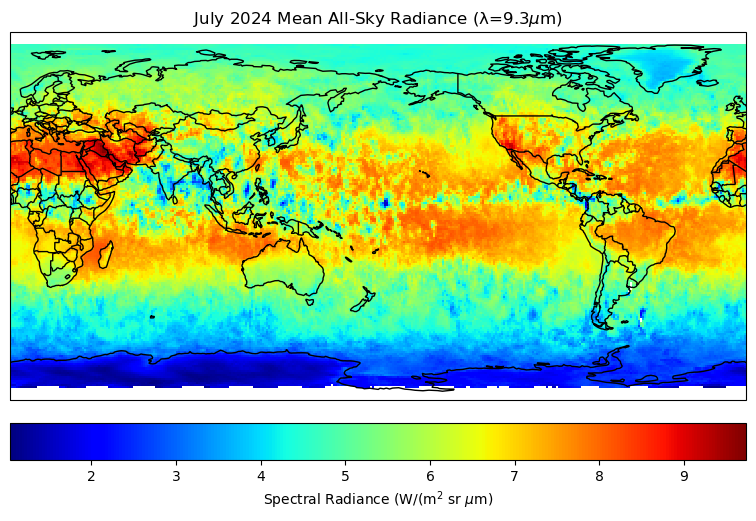

In [5]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(9.5, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.savefig("/projects/etdu2967/CIRES/Kay_Group_Plots/PREFIRE_July_9.3_All-Sky.png", dpi=300, bbox_inches='tight')
plt.show()

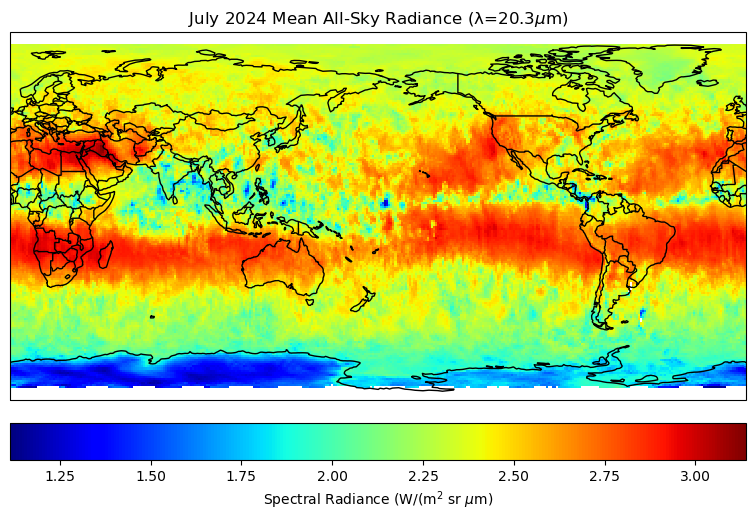

In [6]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(9.5, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.savefig("/projects/etdu2967/CIRES/Kay_Group_Plots/PREFIRE_July_20.3_All-Sky.png", dpi=300, bbox_inches='tight')
plt.show()

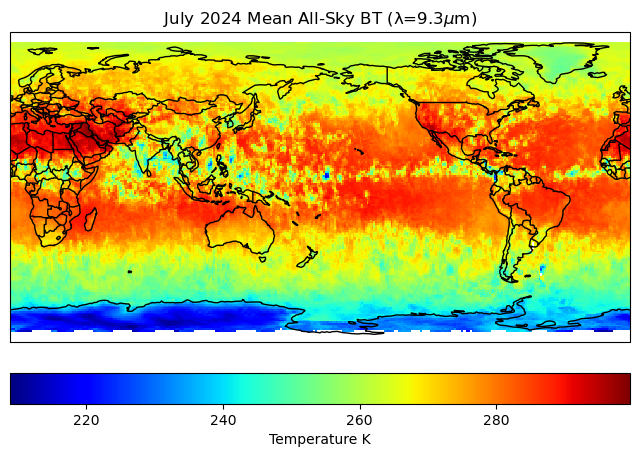

In [7]:
spectral_radiance_test=ds['spectral_BT'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Temperature K')

plt.title('July 2024 Mean All-Sky BT (λ=9.3$\mu$m)')
plt.show()

## * Clear-Sky 

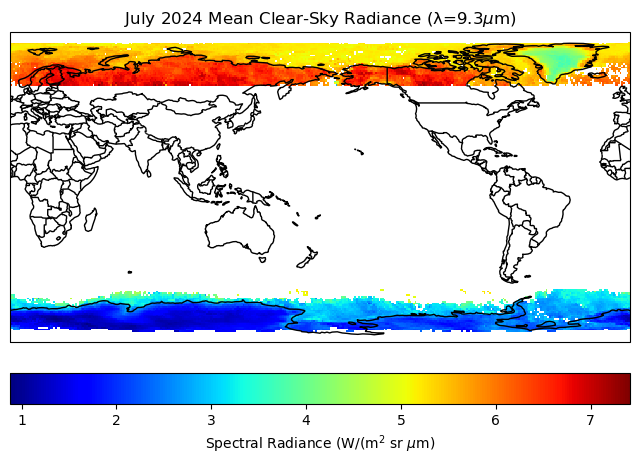

In [8]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Mean Clear-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

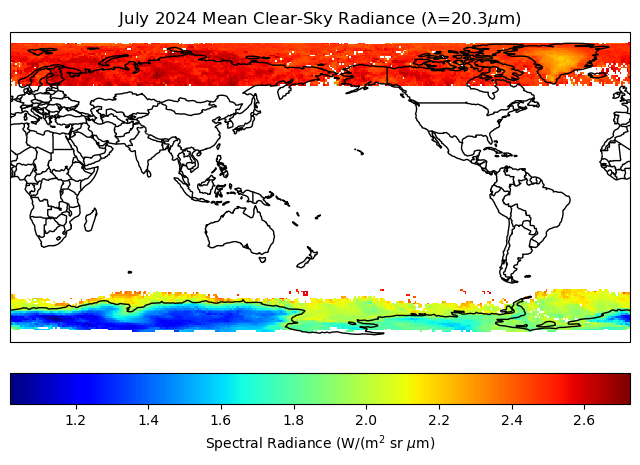

In [9]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# Polar Sterographic Plots

## * All-Sky

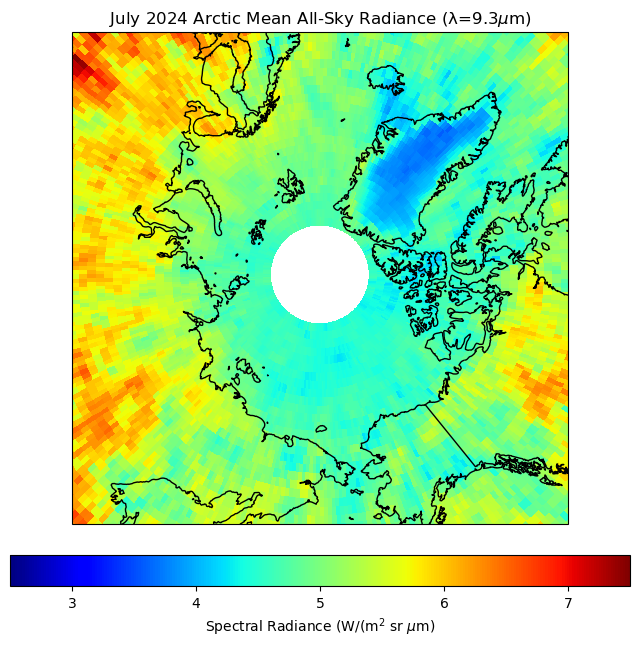

In [10]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.5, vmax=7.5)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Arctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

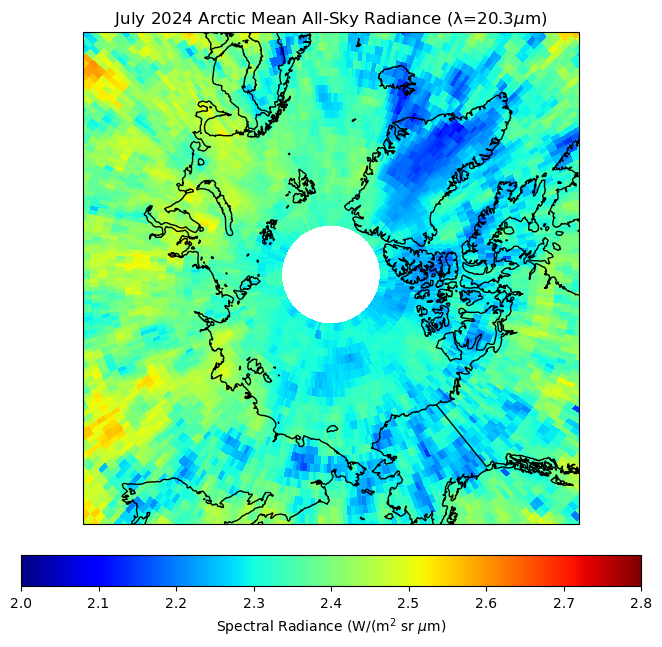

In [11]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.0, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Arctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

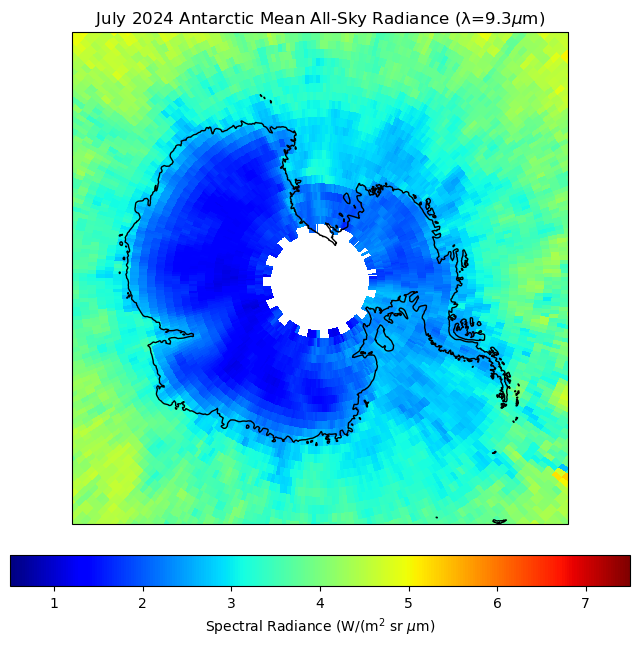

In [12]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=0.5, vmax=7.5)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Antarctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

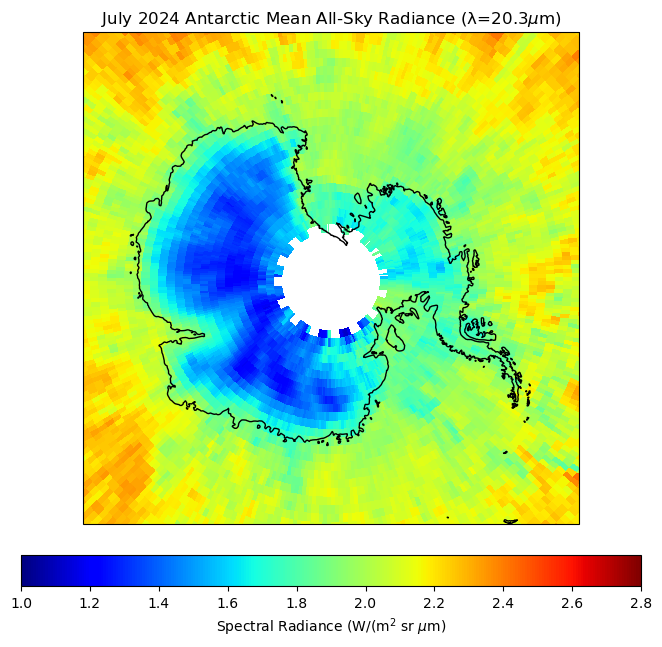

In [13]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.0, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Antarctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

## * Clear-Sky

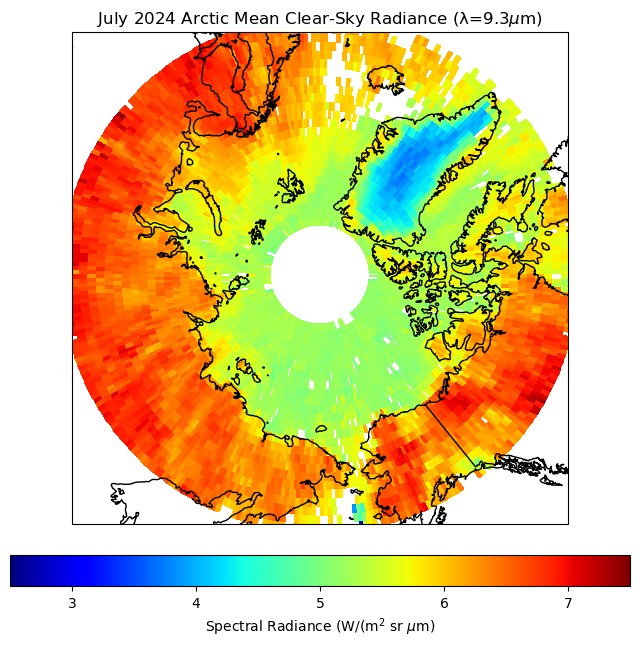

In [14]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.5, vmax=7.5)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Arctic Mean Clear-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

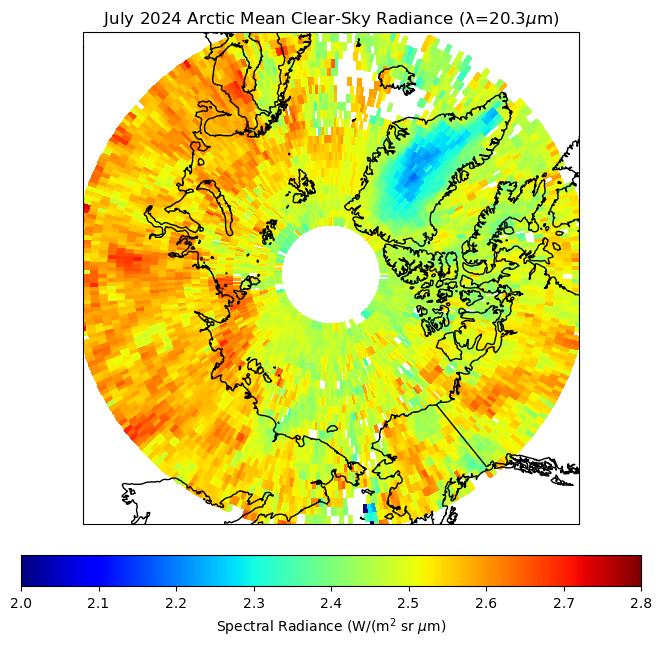

In [15]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.0, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Arctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

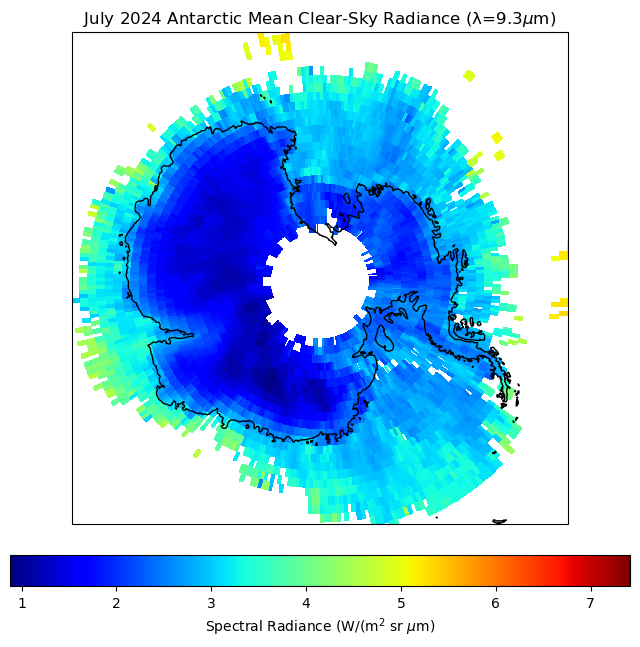

In [16]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Antarctic Mean Clear-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

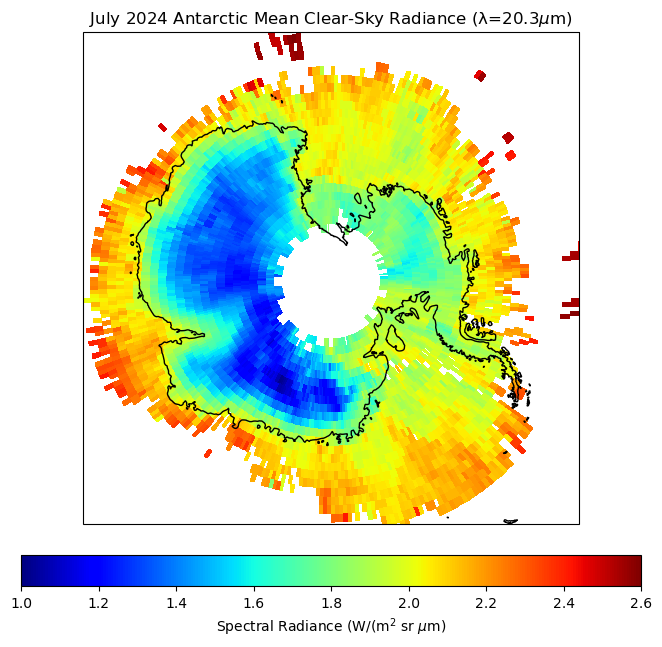

In [17]:
spectral_radiance_test=ds['clear_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=22)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.0, vmax=2.6)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Antarctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# Testing the Counts

In [18]:
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Count_Files/PREFIRE_1B-RAD_Gridded_and_Masked_Count_2024_07.nc")
ds

<xarray.Dataset>
Dimensions:                (time: 1, xtrack: 8, spectral: 63, sfc_type: 9,
                            lat: 168, lon: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2024-07-31
Dimensions without coordinates: xtrack, spectral, sfc_type, lat, lon
Data variables:
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    spectral_BT            (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    longitude              (time, lat, lon) float32 ...
    latitude               (time, lat, lon) float32 ...
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...

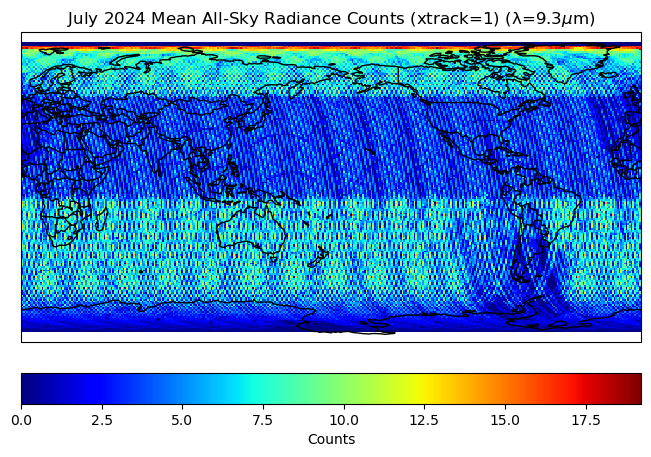

In [19]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','sfc_type']).sel(spectral=9,xtrack=0)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Counts')

plt.title('July 2024 Mean All-Sky Radiance Counts (xtrack=1) (λ=9.3$\mu$m)')
plt.show()

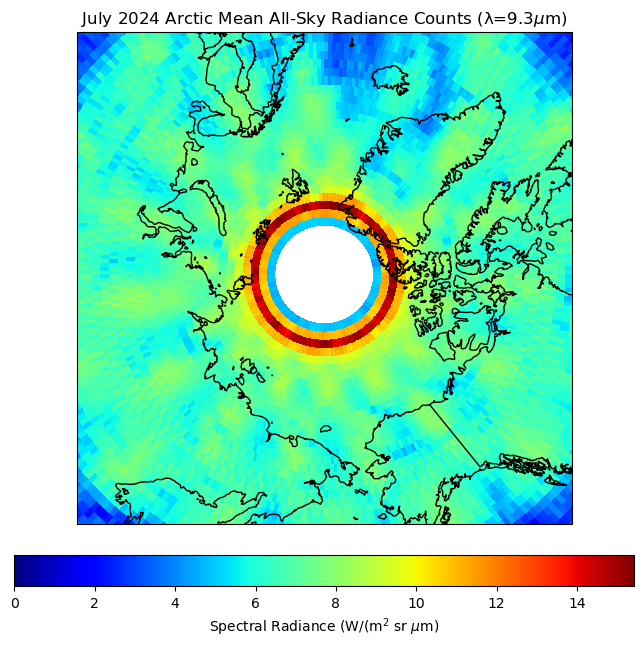

In [20]:
spectral_radiance_test=ds['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds['latitude'].mean('time')
longitude=ds['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('July 2024 Arctic Mean All-Sky Radiance Counts (λ=9.3$\mu$m)')
plt.show()

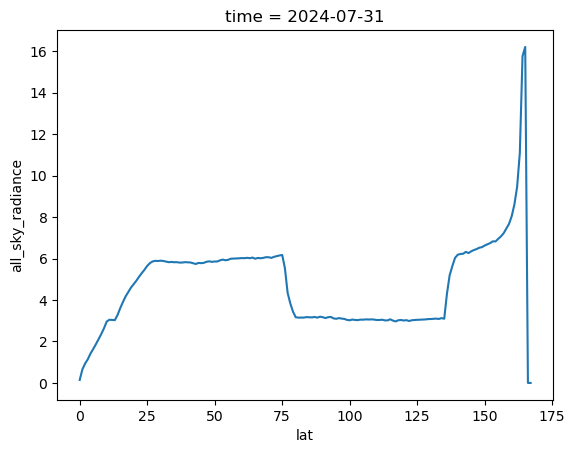

In [21]:
ds["all_sky_radiance"].mean(dim=['sfc_type','lon']).sel(xtrack=0,spectral=9).plot()

# Quickly we need to do a test that individual granules match the L3 radiancee
## We will do this through a few methods which includes:
### * Get a mean spectra
### * Plot the granules side by side

# Unweighted Version

## This will define the L3 granule dataset for our mean spectra later 

In [22]:
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

year="2025"
month="02"

# SET PATH
#for testing, let's start with June since it has the least amount of files
monthly_processed_PREFIRE_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/"+year+"_"+month+"/*.nc") # you can change this for your desired month
monthly_processed_PREFIRE_files.sort()

#LOOP THROUGH FILES
print('Total Number of Files: '+str(len(monthly_processed_PREFIRE_files)))
#for i in range(0,len(monthly_processed_PREFIRE_files)):
for i in range(1, 2): #for testing, we're going to start with only 1 file, then go to 2

    # turn it into a dataframe, get the sum and count, then in the next step we will save it as an xarray array
    file_split_list=monthly_processed_PREFIRE_files[i].split('/')
    file_name=file_split_list[7]
    print('Now Running: '+str(i+1)+'  ('+str(file_name)+')')
    
    #OPEN AS XARRAY DATASET
    ds=xr.open_dataset(monthly_processed_PREFIRE_files[i])
    
    #GROUP BY LAT and LON
    df=ds.to_dataframe()
    avg_variables = ["xtrack", "spectral", "sfc_type","spectral_radiance_unc", "all_sky_radiance", "clear_sky_radiance", "spectral_BT", "latitude_1_deg", "longitude_1_deg"]
    # save as a netcdf file to store the information
        #DELETE EACH MONTH WHEN YOU'RE DONE SINCE IT TAKES UP A LOT OF SPACE
    # okay, here's my idea: reset the index and remove time, that way it's basically just a regular spreadsheet
    # then we can add all of our values
    # I edited avg_variables to include an xtrack, and spectral so we can remove time
    # now we can add some fill values
    df=df.reset_index()
    df=df[avg_variables]
    #make a loop for every lat and lon
        #83.8 is the maximum and minimum latitude out of any granule, which means that you are safe to stop at the bin of +/- 83.5
    
    # set variables for the centers of our 1x1 gridcell boxes
    lat_bin_edges = np.arange(-84, 85, 1)  # 181 edges for 180 bins
    lat_bin_centers = lat_bin_edges[:-1] + 0.5  # Centered at -89.5 to 89.5
    lon_bin_edges = np.arange(-180, 181, 1) # from -180 to 180 (inclusive)
    lon_bin_centers =  lon_bin_edges[:-1] + 0.5 # centered: -179.5 to 179.5
    
    # add fill values at every latitude that there is not an entry
    for i in range(len(lat_bin_centers)):
        if not (df['latitude_1_deg'] == lat_bin_centers[i]).any():
            #print(lat_bin_centers[i])
            lat_fill_df = pd.DataFrame([[0, 0, 0, np.nan, np.nan, np.nan, np.nan, lat_bin_centers[i], 0.5]], columns=avg_variables)
            df=pd.concat([df,lat_fill_df])
    # add fill values at every longitude that there is not an entry
    for i in range(len(lon_bin_centers)):
        if not (df['longitude_1_deg'] == lon_bin_centers[i]).any():
            #print(lon_bin_centers[i])
            lon_fill_df = pd.DataFrame([[0, 0, 0, np.nan, np.nan, np.nan, np.nan, 0.5, lon_bin_centers[i]]], columns=avg_variables)
            df=pd.concat([df,lon_fill_df])
    
    data_count_stored = df.groupby(by=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg']).count().astype(np.float32)
    data_sum_stored = df.groupby(by=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg']).sum().astype(np.float32)
    #we need to see if these are appending correctly first
    #print(nom)
    data_count_stored = data_count_stored.to_xarray()
    data_sum_stored = data_sum_stored.to_xarray()
    #data_count_stored.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Count_Copies/"+year+"_"+month+"/"+"Count_"+file_name)#, index_label=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg'])
    #data_sum_stored.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Sum_Copies/"+year+"_"+month+"/"+"Sum_"+file_name)
print("Reformatting Combined Data, You Made it Through Aggregation, Yay!")

gridded_ds=data_sum_stored/data_count_stored
del data_sum_stored #delete to save storage

# add a latitude and a longitude array

longitude=gridded_ds['longitude_1_deg']
latitude=gridded_ds['latitude_1_deg']
longitude_repeated=np.repeat(longitude.values[np.newaxis, :], latitude.values.shape[0], axis=0)
latitude_repeated=np.repeat(latitude.values[:, np.newaxis], longitude.values.shape[0], axis=1)
gridded_ds['longitude']=xr.DataArray(longitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"])
gridded_ds['latitude']=xr.DataArray(latitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"])
data_count_stored['longitude']=xr.DataArray(longitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"]).astype(np.float32)
data_count_stored['latitude']=xr.DataArray(latitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"]).astype(np.float32)

# add a wavelength and idealized wavelength array (should have the shape 8,63 for the xtrack and spectral dimension)
    # they're all identical, so I picked the first one of each month to use

wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["wavelength"]
idealized_wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["idealized_wavelength"]
gridded_ds['wavelength']=wavelength
gridded_ds['idealized_wavelength']=idealized_wavelength
data_count_stored['wavelength']=wavelength
data_count_stored['idealized_wavelength']=idealized_wavelength

#rename latitude_1_deg and longitude_1_deg to lat and lon
gridded_ds = gridded_ds.rename({"latitude_1_deg": "lat", "longitude_1_deg": "lon"})
data_count_stored = data_count_stored.rename({"latitude_1_deg": "lat", "longitude_1_deg": "lon"})

# remove all coordinates
gridded_ds = gridded_ds.drop_vars("xtrack")
gridded_ds = gridded_ds.drop_vars("spectral")
gridded_ds = gridded_ds.drop_vars("sfc_type")
gridded_ds = gridded_ds.drop_vars("lat")
gridded_ds = gridded_ds.drop_vars("lon")
data_count_stored = data_count_stored.drop_vars("xtrack")
data_count_stored = data_count_stored.drop_vars("spectral")
data_count_stored = data_count_stored.drop_vars("sfc_type")
data_count_stored = data_count_stored.drop_vars("lat")
data_count_stored = data_count_stored.drop_vars("lon")

# add time as a coordinate for combining
    #remove the time variable because it is not needed anymore 
    #(edit: when we did the groupby this time, time wasn't included, so the following code is commented out for now)
# gridded_ds = gridded_ds.drop_vars("time")
# data_count_stored = data_count_stored.drop_vars("time")

    #add the coordinate as the last day of the month for indexing with combined dataset
time_string=year+"-"+month+"-01"
time = pd.date_range(time_string, periods=1, freq="M")
gridded_ds = gridded_ds.expand_dims(time=time) # Adds time as a new dimension
data_count_stored = data_count_stored.expand_dims(time=time) # Repeat for the count dataset

ds_L3_granule=gridded_ds
del gridded_ds
print("Done!")

Total Number of Files: 389
Now Running: 2  (PREFIRE_1B-RAD_Gridded_and_Masked_20250201003744_03807.nc)
Reformatting Combined Data, You Made it Through Aggregation, Yay!
Done!


# Weighted Version

## This will define the L3 granule count-weighted dataset (across the time dimension) for our mean spectra later

### (Since this time dimension for this test is actually attached to the month, the added time dimension actually works more as a proxy as a granule ID dimension)

In [23]:
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

year="2025"
month="02"

# SET PATH
#for testing, let's start with June since it has the least amount of files
monthly_processed_PREFIRE_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/"+year+"_"+month+"/*.nc") # you can change this for your desired month
monthly_processed_PREFIRE_files.sort()

#LOOP THROUGH FILES
print('Total Number of Files: '+str(len(monthly_processed_PREFIRE_files)))
#for i in range(0,len(monthly_processed_PREFIRE_files)):
for i in range(1, 2): #for testing, we're going to start with only 1 file, then go to 2

    # turn it into a dataframe, get the sum and count, then in the next step we will save it as an xarray array
    file_split_list=monthly_processed_PREFIRE_files[i].split('/')
    file_name=file_split_list[7]
    print('Now Running: '+str(i+1)+'  ('+str(file_name)+')')
    
    #OPEN AS XARRAY DATASET
    ds=xr.open_dataset(monthly_processed_PREFIRE_files[i])
    
    #GROUP BY LAT and LON
    df=ds.to_dataframe()
    avg_variables = ["xtrack", "spectral", "sfc_type","spectral_radiance_unc", "all_sky_radiance", "clear_sky_radiance", "spectral_BT", "latitude_1_deg", "longitude_1_deg"]
    # save as a netcdf file to store the information
        #DELETE EACH MONTH WHEN YOU'RE DONE SINCE IT TAKES UP A LOT OF SPACE
    # okay, here's my idea: reset the index and remove time, that way it's basically just a regular spreadsheet
    # then we can add all of our values
    # I edited avg_variables to include an xtrack, and spectral so we can remove time
    # now we can add some fill values
    df=df.reset_index()
    df=df[avg_variables]
    #make a loop for every lat and lon
        #83.8 is the maximum and minimum latitude out of any granule, which means that you are safe to stop at the bin of +/- 83.5
    
    # set variables for the centers of our 1x1 gridcell boxes
    lat_bin_edges = np.arange(-84, 85, 1)  # 181 edges for 180 bins
    lat_bin_centers = lat_bin_edges[:-1] + 0.5  # Centered at -89.5 to 89.5
    lon_bin_edges = np.arange(-180, 181, 1) # from -180 to 180 (inclusive)
    lon_bin_centers =  lon_bin_edges[:-1] + 0.5 # centered: -179.5 to 179.5
    
    # add NaN fill values at every latitude that there is not an entry
    for i in range(len(lat_bin_centers)):
        if not (df['latitude_1_deg'] == lat_bin_centers[i]).any():
            #print(lat_bin_centers[i])
            lat_fill_df = pd.DataFrame([[0, 0, 0, np.nan, np.nan, np.nan, np.nan, lat_bin_centers[i], 0.5]], columns=avg_variables)
            df=pd.concat([df,lat_fill_df])
    # add NaN fill values at every longitude that there is not an entry
    for i in range(len(lon_bin_centers)):
        if not (df['longitude_1_deg'] == lon_bin_centers[i]).any():
            #print(lon_bin_centers[i])
            lon_fill_df = pd.DataFrame([[0, 0, 0, np.nan, np.nan, np.nan, np.nan, 0.5, lon_bin_centers[i]]], columns=avg_variables)
            df=pd.concat([df,lon_fill_df])
    
    data_count_stored = df.groupby(by=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg']).count().astype(np.float32)
    data_sum_stored = df.groupby(by=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg']).sum().astype(np.float32)
    #we need to see if these are appending correctly first
    #print(nom)
    data_count_stored = data_count_stored.to_xarray()
    data_sum_stored = data_sum_stored.to_xarray()
    #data_count_stored.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Count_Copies/"+year+"_"+month+"/"+"Count_"+file_name)#, index_label=['xtrack', 'spectral', 'sfc_type', 'latitude_1_deg', 'longitude_1_deg'])
    #data_sum_stored.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Sum_Copies/"+year+"_"+month+"/"+"Sum_"+file_name)
print("Reformatting Combined Data, You Made it Through Aggregation, Yay!")

#weighing the granule data before taking the average
    #add a time dimension for weighing that will eventually be removed
    #template: weighted_mean = data.weighted(weights).mean(dim="time")
time_string=year+"-"+month+"-01"
time = pd.date_range(time_string, periods=1, freq="M")
data_sum_stored = data_sum_stored.expand_dims(time=time) # Adds time as a new dimension
data_count_stored = data_count_stored.expand_dims(time=time) # Adds time as a new dimension

data_sum_stored["all_sky_radiance"]=data_sum_stored["all_sky_radiance"].weighted(data_count_stored["all_sky_radiance"].fillna(0)).mean(dim='time') #add fillna(0) for the fill value nans added for missing lat/lons in the granule
    #remove the time dimension from the count so all variables are the same shape
data_count_stored["all_sky_radiance"]=data_count_stored["all_sky_radiance"].mean(dim='time')

print(data_sum_stored)
gridded_ds=data_sum_stored/data_count_stored
del data_sum_stored #delete to save storage

# add a latitude and a longitude array

longitude=gridded_ds['longitude_1_deg']
latitude=gridded_ds['latitude_1_deg']
longitude_repeated=np.repeat(longitude.values[np.newaxis, :], latitude.values.shape[0], axis=0)
latitude_repeated=np.repeat(latitude.values[:, np.newaxis], longitude.values.shape[0], axis=1)
gridded_ds['longitude']=xr.DataArray(longitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"])
gridded_ds['latitude']=xr.DataArray(latitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"])
data_count_stored['longitude']=xr.DataArray(longitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"]).astype(np.float32)
data_count_stored['latitude']=xr.DataArray(latitude_repeated, dims=["latitude_1_deg", "longitude_1_deg"]).astype(np.float32)

# add a wavelength and idealized wavelength array (should have the shape 8,63 for the xtrack and spectral dimension)
    # they're all identical, so I picked the first one of each month to use

wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["wavelength"]
idealized_wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["idealized_wavelength"]
gridded_ds['wavelength']=wavelength
gridded_ds['idealized_wavelength']=idealized_wavelength
data_count_stored['wavelength']=wavelength
data_count_stored['idealized_wavelength']=idealized_wavelength

#rename latitude_1_deg and longitude_1_deg to lat and lon
gridded_ds = gridded_ds.rename({"latitude_1_deg": "lat", "longitude_1_deg": "lon"})
data_count_stored = data_count_stored.rename({"latitude_1_deg": "lat", "longitude_1_deg": "lon"})

# remove all coordinates
gridded_ds = gridded_ds.drop_vars("xtrack")
gridded_ds = gridded_ds.drop_vars("spectral")
gridded_ds = gridded_ds.drop_vars("sfc_type")
gridded_ds = gridded_ds.drop_vars("lat")
gridded_ds = gridded_ds.drop_vars("lon")
data_count_stored = data_count_stored.drop_vars("xtrack")
data_count_stored = data_count_stored.drop_vars("spectral")
data_count_stored = data_count_stored.drop_vars("sfc_type")
data_count_stored = data_count_stored.drop_vars("lat")
data_count_stored = data_count_stored.drop_vars("lon")

# add time as a coordinate for combining
    #remove the time variable because it is not needed anymore 
    #(edit: when we did the groupby this time, time wasn't included, so the following code is commented out for now)
# gridded_ds = gridded_ds.drop_vars("time")
# data_count_stored = data_count_stored.drop_vars("time")

    #add the coordinate as the last day of the month for indexing with combined dataset
    #READ ME! Actually, we do not need to add a time dimension this time because the time dimension already got added when we took a weighted mean of the all_sky_radiance
# time_string=year+"-"+month+"-01"
# time = pd.date_range(time_string, periods=1, freq="M")
# gridded_ds = gridded_ds.expand_dims(time=time) # Adds time as a new dimension
# data_count_stored = data_count_stored.expand_dims(time=time) # Repeat for the count dataset
ds_L3_granule_weighted=gridded_ds
print("Done!")

Total Number of Files: 389
Now Running: 2  (PREFIRE_1B-RAD_Gridded_and_Masked_20250201003744_03807.nc)
Reformatting Combined Data, You Made it Through Aggregation, Yay!
<xarray.Dataset>
Dimensions:                (time: 1, xtrack: 8, spectral: 63, sfc_type: 9,
                            latitude_1_deg: 168, longitude_1_deg: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2025-02-28
  * xtrack                 (xtrack) int64 0 1 2 3 4 5 6 7
  * spectral               (spectral) int64 0 1 2 3 4 5 6 ... 57 58 59 60 61 62
  * sfc_type               (sfc_type) int64 0 1 2 3 4 5 6 7 8
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
Data variables:
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, latitude_1_deg, longitude_1_deg) float32 ...
    all_sky_radiance       (xtrack, spectral, sfc_type, latitude_1_deg, longitude_1_deg) float32 ...
    clear_sky_ra

In [24]:
ds_L3_granule_weighted

<xarray.Dataset>
Dimensions:                (time: 1, xtrack: 8, spectral: 63, sfc_type: 9,
                            lat: 168, lon: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2025-02-28
Dimensions without coordinates: xtrack, spectral, sfc_type, lat, lon
Data variables:
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    all_sky_radiance       (xtrack, spectral, sfc_type, lat, lon) float32 nan...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    spectral_BT            (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    longitude              (lat, lon) float64 -179.5 -178.5 ... 178.5 179.5
    latitude               (lat, lon) float64 -83.5 -83.5 -83.5 ... 83.5 83.5
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...

In [25]:
ds_L3_granule

<xarray.Dataset>
Dimensions:                (time: 1, xtrack: 8, spectral: 63, sfc_type: 9,
                            lat: 168, lon: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2025-02-28
Dimensions without coordinates: xtrack, spectral, sfc_type, lat, lon
Data variables:
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    spectral_BT            (time, xtrack, spectral, sfc_type, lat, lon) float32 ...
    longitude              (time, lat, lon) float64 -179.5 -178.5 ... 179.5
    latitude               (time, lat, lon) float64 -83.5 -83.5 ... 83.5 83.5
    wavelength             (time, xtrack, spectral) float32 nan nan ... 54.11
    idealized_wavelength   (time, xtrack, spectral) float32 1.672 ... 53.98

## This will define the L1 processed granule for our mean spectra later

### The processed version of the L1-RAD data has a time dimension in place of the atrack and an added dimension to sort surface types using a mask from the AUX-MET product

In [26]:
ds_L1_granule=xr.open_dataset(monthly_processed_PREFIRE_files[1])
ds_L1_granule

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7101, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2025-02-01T00:37:49.92565004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...

## Plotting the L3, Weighted L3, Processed L1, and Raw L1 (These should be nearly identical)

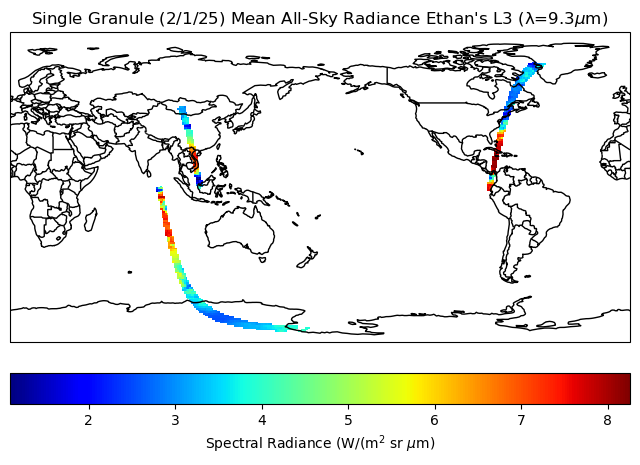

In [27]:
spectral_radiance_test=ds_L3_granule['all_sky_radiance'].mean(['time','xtrack','sfc_type']).sel(spectral=9)
latitude=ds_L3_granule['latitude'].mean('time')
longitude=ds_L3_granule['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title("Single Granule (2/1/25) Mean All-Sky Radiance Ethan's L3 (λ=9.3$\mu$m)")
plt.show()

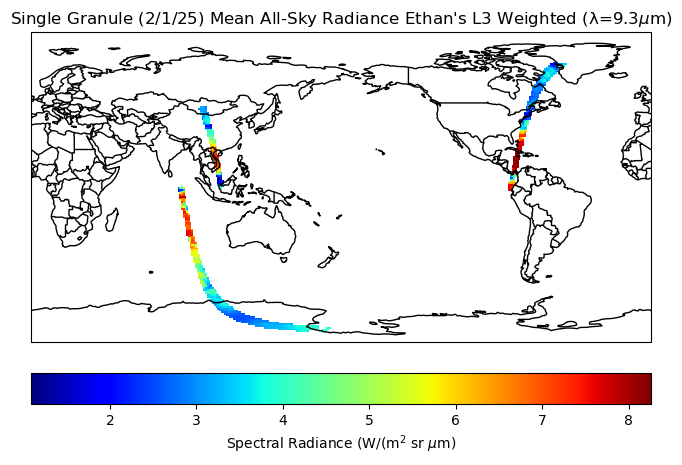

In [28]:
spectral_radiance_test=ds_L3_granule_weighted['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=ds_L3_granule['latitude'].mean('time')
longitude=ds_L3_granule['longitude'].mean('time')

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title("Single Granule (2/1/25) Mean All-Sky Radiance Ethan's L3 Weighted (λ=9.3$\mu$m)")
plt.show()

Text(0.5, 1.0, 'Single Granule (2/1/25) Mean All-Sky Radiance Preprocessed L1 (λ=9.3$\\mu$m)')

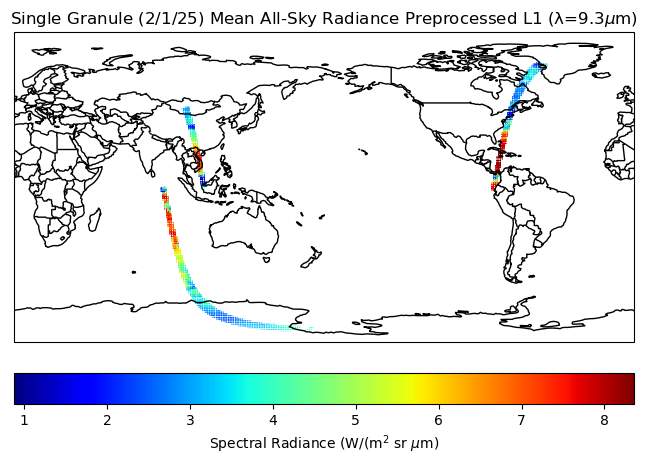

In [29]:
test_radiance = ds_L1_granule["all_sky_radiance"]
latitude = ds_L1_granule["latitude_1_deg"]
longitude = ds_L1_granule["longitude_1_deg"]

# Select a single granule and spectral channel
granule_radiance = test_radiance.mean('sfc_type').sel(spectral=9)


fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
sc = ax.scatter(
    longitude.values,
    latitude.values,
    c=granule_radiance.values,
    cmap='jet',
    marker='o',
    linewidth=0.5,
    transform=ccrs.PlateCarree(),
    s=0.005,
)

# Add a colorbar
cb = plt.colorbar(sc, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')
plt.title('Single Granule (2/1/25) Mean All-Sky Radiance Preprocessed L1 (λ=9.3$\mu$m)')




/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/PREFIRE_SAT2_1B-RAD_R01_P00_20250201003744_03807.nc


Text(0.5, 1.0, 'Single Granule (2/1/25) Mean All-Sky Radiance L1 (λ=9.3$\\mu$m)')

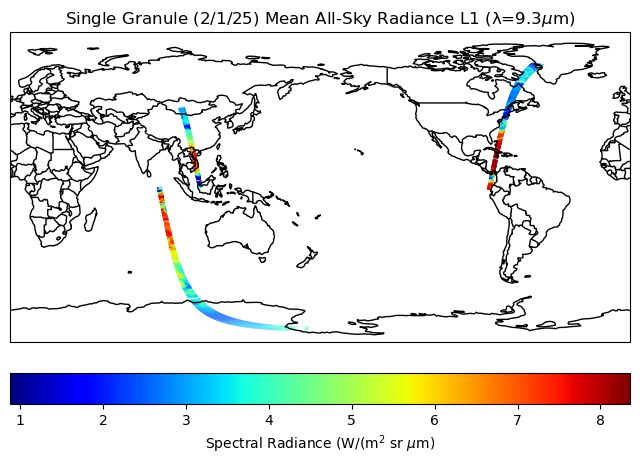

In [30]:

# %%
# Finding the exact file index for our L1 Plot based on the granule ID
prefire_files = glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
prefire_files.sort()
print(prefire_files[3055])
#cool! this is the exact granule ID, so our index is 3055!

# %%

test_ds = xr.open_dataset(prefire_files[3055], group="Radiance")
test_geo = xr.open_dataset(prefire_files[3055], group="Geometry")

#masking
quality_flags=test_ds["radiance_quality_flag"]
test_ds["spectral_radiance"] = test_ds["spectral_radiance"].where(quality_flags == 0)

test_radiance = test_ds["spectral_radiance"]
# %%

# Relabel atrack dimension to time
test_radiance['atrack'] = test_geo["ctime"]
test_radiance = test_radiance.rename({"atrack": "time"})

# Example of plotting L1B data on a globe
latitude = test_geo["latitude"]
longitude = test_geo["longitude"]

# Select a single granule and spectral channel
granule_radiance = test_radiance.sel(spectral=9)

# %%
# Plotting on a globe using Cartopy


fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
sc = ax.scatter(
    longitude.values,
    latitude.values,
    c=granule_radiance.values,
    cmap='jet',
    marker='o',
    linewidth=0.5,
    transform=ccrs.PlateCarree(),
    s=0.005,
)

# Add a colorbar
cb = plt.colorbar(sc, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('Single Granule (2/1/25) Mean All-Sky Radiance L1 (λ=9.3$\mu$m)')
# %%


# Okay cool! those are identical too. We can do a specta now

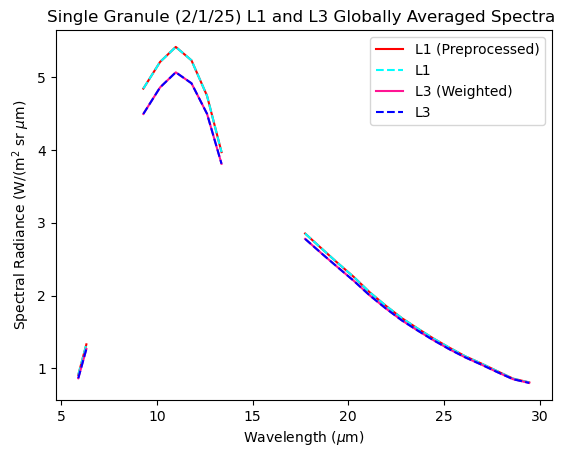

In [31]:
prefire_files = glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
prefire_files.sort()
monthly_processed_PREFIRE_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/"+year+"_"+month+"/*.nc") # you can change this for your desired month
monthly_processed_PREFIRE_files.sort()

ds_L1_granule=xr.open_dataset(monthly_processed_PREFIRE_files[1])
test_ds = xr.open_dataset(prefire_files[3055], group="Radiance")
quality_flags=test_ds["radiance_quality_flag"]
test_ds["spectral_radiance"] = test_ds["spectral_radiance"].where(quality_flags == 0)
#ds_L3_granule=gridded_ds #ds_L3_granule is defined by a processing code block above and this is commented out becaused the weighted L3 uses the same variable names
#ds_L3_granule_weighted is also defined by a processing code block above


wavelength=ds_L3_granule['wavelength'].mean('time').sel(xtrack=0)
spectral_radiance_test_L3_weighted=ds_L3_granule_weighted['all_sky_radiance'].mean(['xtrack','sfc_type','lat','lon']) #the time dimension is already averaged in the mean
spectral_radiance_test_L3=ds_L3_granule['all_sky_radiance'].mean(['time','xtrack','sfc_type','lat','lon'])
spectral_radiance_test_L1_preprocessed=ds_L1_granule['all_sky_radiance'].mean(['time','xtrack','sfc_type'])
spectral_radiance_test_L1=test_ds['spectral_radiance'].mean(dim=['xtrack', 'atrack'])
plt.plot(wavelength, spectral_radiance_test_L1_preprocessed, label='L1 (Preprocessed)', color='r')
plt.plot(wavelength, spectral_radiance_test_L1, label='L1', color='cyan', linestyle='dashed')
plt.plot(wavelength, spectral_radiance_test_L3_weighted, label='L3 (Weighted)', color='deeppink')
plt.plot(wavelength, spectral_radiance_test_L3, label='L3', color='blue', linestyle='dashed')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Spectral Radiance (W/(m$^2$ sr $\mu$m)')
plt.title('Single Granule (2/1/25) L1 and L3 Globally Averaged Spectra ')
plt.legend()
plt.show()

## Note for the User: The L3 Weighted should be analyzed about a different dimension like latitude or longitude, but for now, this is sufficient to explain the discrepancy as due to averaging across a gridcell

# Using the Combined L3 Dataset of the Whole Mission

In [32]:
# okay, let's start by getting these arrays into the right shape
# we should probably do a 
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date
ds=xr.open_mfdataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Gridcell_Averaged_Files/*.nc")
summer_ds=ds.sel(time=ds['time'].dt.month.isin([7, 8])).mean("time") #June is excluded because there isn't sufficient data from that month
winter_ds=ds.sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time")
ds

<xarray.Dataset>
Dimensions:                (time: 11, xtrack: 8, spectral: 63, sfc_type: 9,
                            lat: 168, lon: 360)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-30 ... 2025-04-30
Dimensions without coordinates: xtrack, spectral, sfc_type, lat, lon
Data variables:
    all_sky_radiance       (time, xtrack, spectral, sfc_type, lat, lon) float32 dask.array<chunksize=(1, 8, 63, 9, 168, 360), meta=np.ndarray>
    clear_sky_radiance     (time, xtrack, spectral, sfc_type, lat, lon) float32 dask.array<chunksize=(1, 8, 63, 9, 168, 360), meta=np.ndarray>
    spectral_BT            (time, xtrack, spectral, sfc_type, lat, lon) float32 dask.array<chunksize=(1, 8, 63, 9, 168, 360), meta=np.ndarray>
    spectral_radiance_unc  (time, xtrack, spectral, sfc_type, lat, lon) float32 dask.array<chunksize=(1, 8, 63, 9, 168, 360), meta=np.ndarray>
    longitude              (time, lat, lon) float64 dask.array<chunksize=(1, 168, 360), meta=np.ndarray>
    latitude               (time, lat, lon) float64 dask.array<chunksize=(1, 168, 360), meta=np.ndarray>
    wavelength             (time, xtrack, spectral) float32 dask.array<chunksize=(1, 8, 63), meta=np.ndarray>
    idealized_wavelength   (time, xtrack, spectral) float32 dask.array<chunksize=(1, 8, 63), meta=np.ndarray>

# (JA)

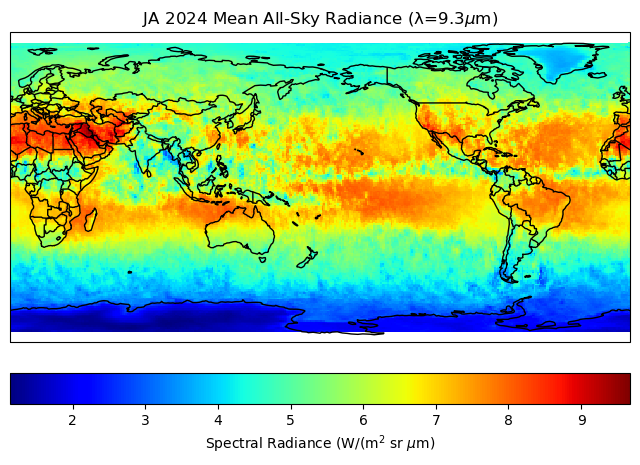

In [33]:
#just as a quick sanity check, let's make a spatial plot
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

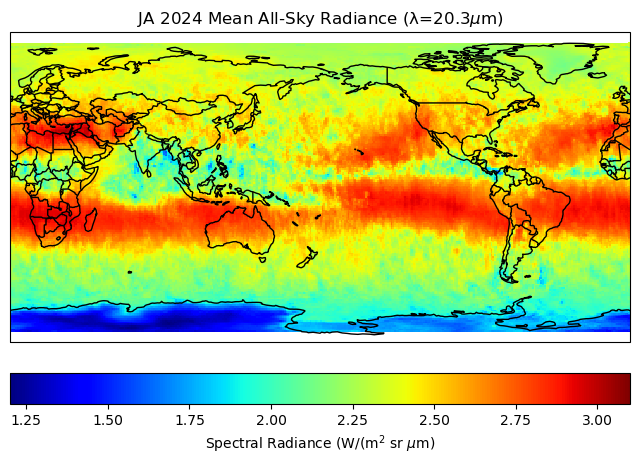

In [34]:
#just as a quick sanity check, let's make a spatial plot
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.2, vmax=3.1)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')
plt.title('JA 2024 Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

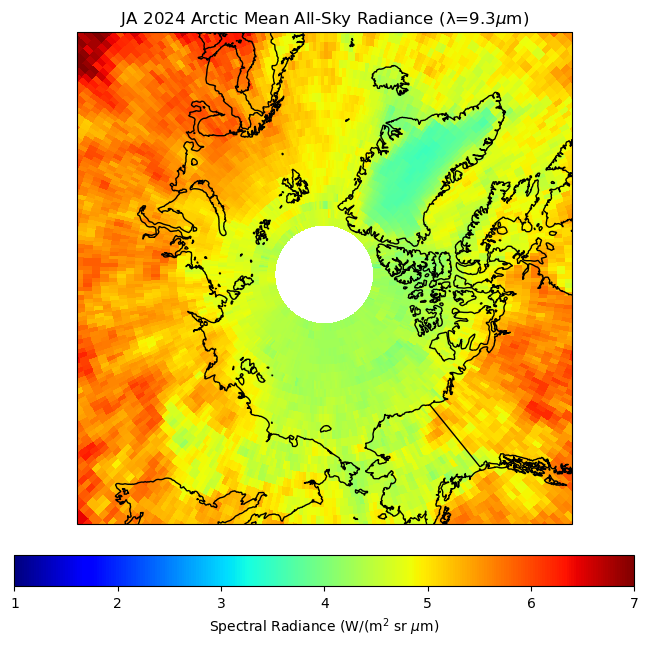

In [35]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1, vmax=7)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Arctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

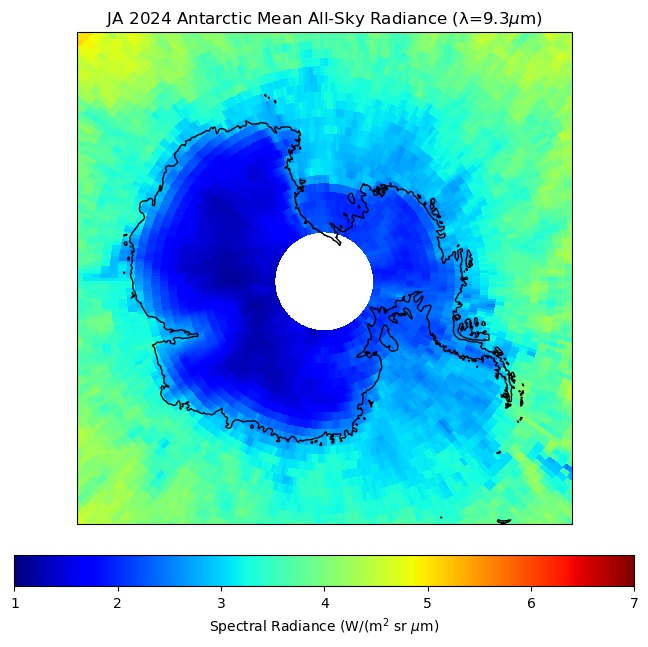

In [36]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1, vmax=7)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Antarctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

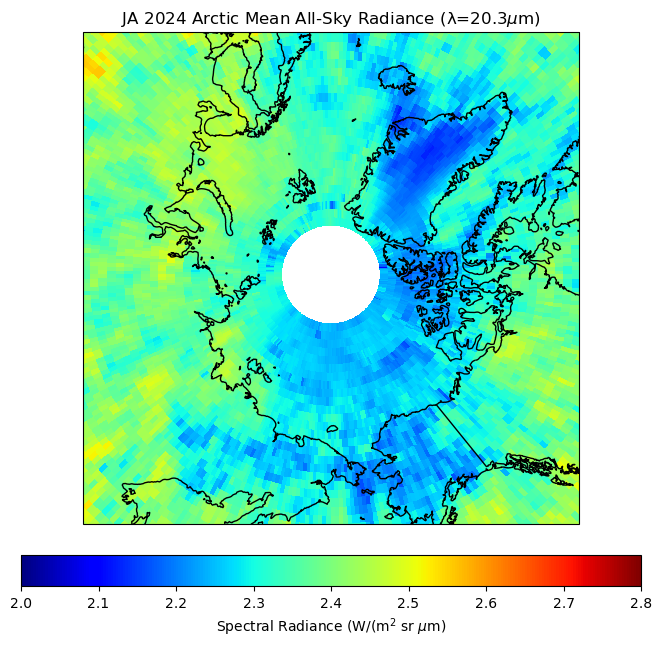

In [37]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.0, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Arctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.savefig("/projects/etdu2967/CIRES/Kay_Group_Plots/PREFIRE_Arctic_JA_20.3_All-Sky.png", dpi=300, bbox_inches='tight')
plt.show()

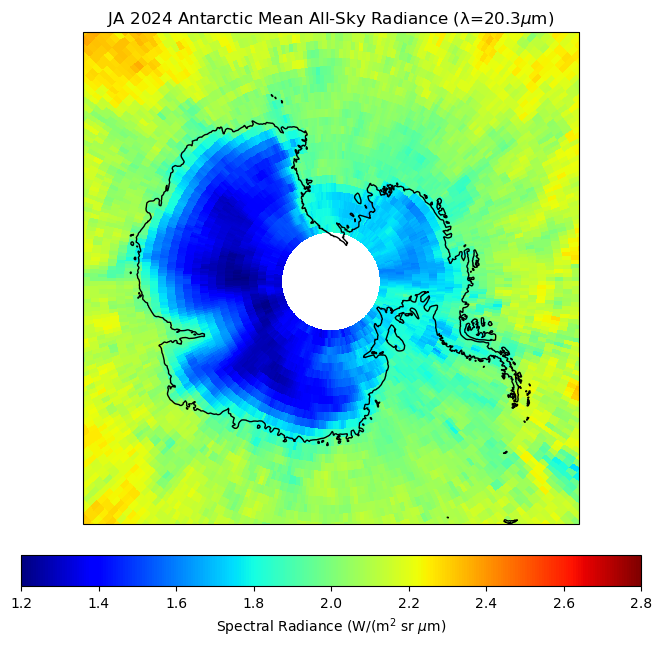

In [38]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.2, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Antarctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# (DJF)

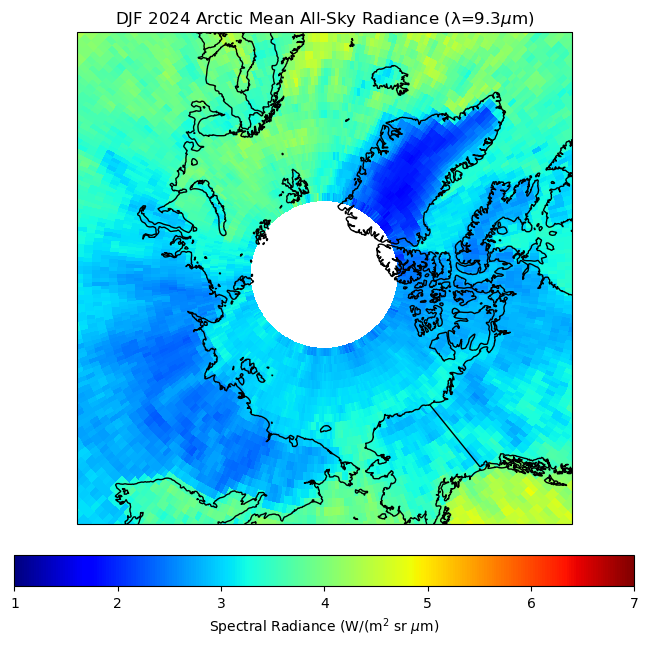

In [39]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1, vmax=7)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Arctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

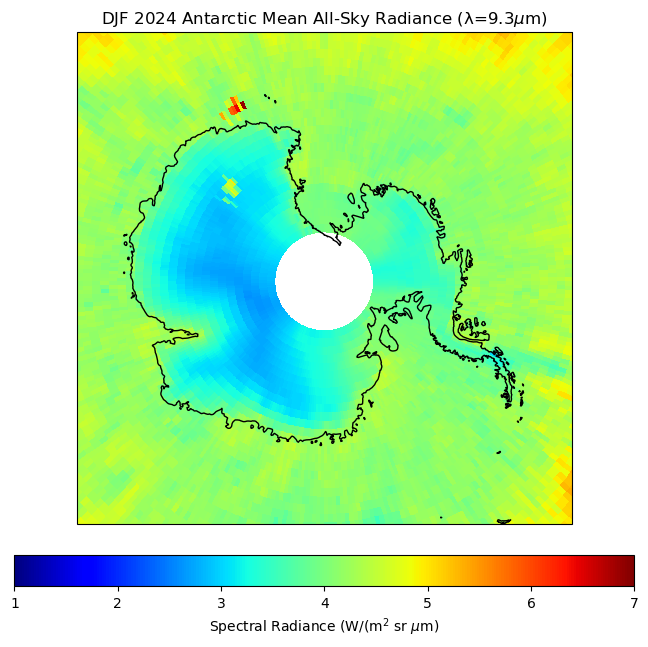

In [40]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1, vmax=7)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Antarctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

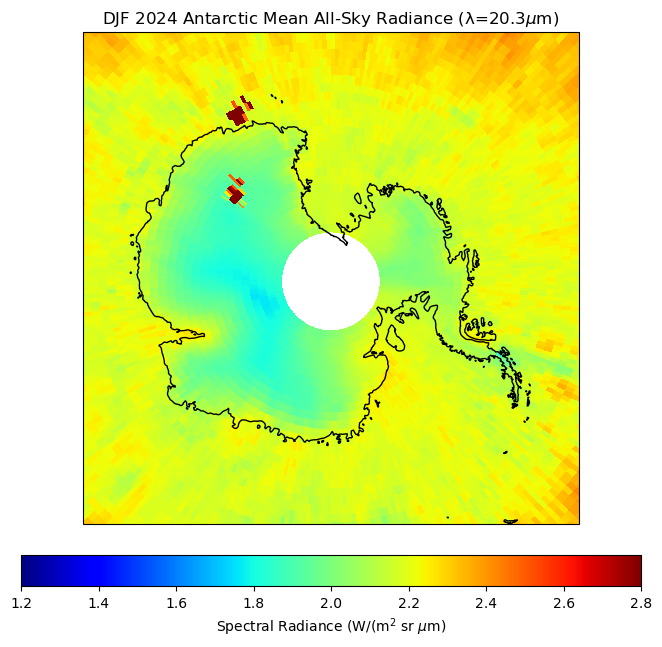

In [41]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.2, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Antarctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

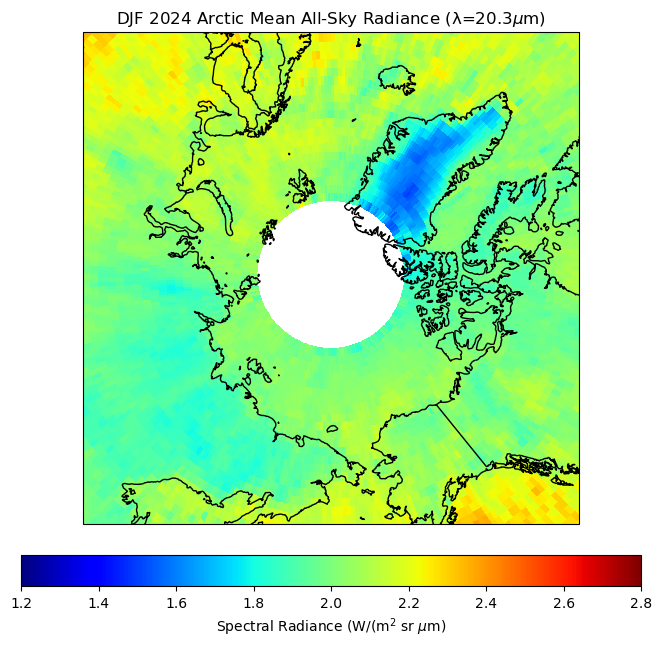

In [42]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.2, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Arctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# Clear-Sky Versions

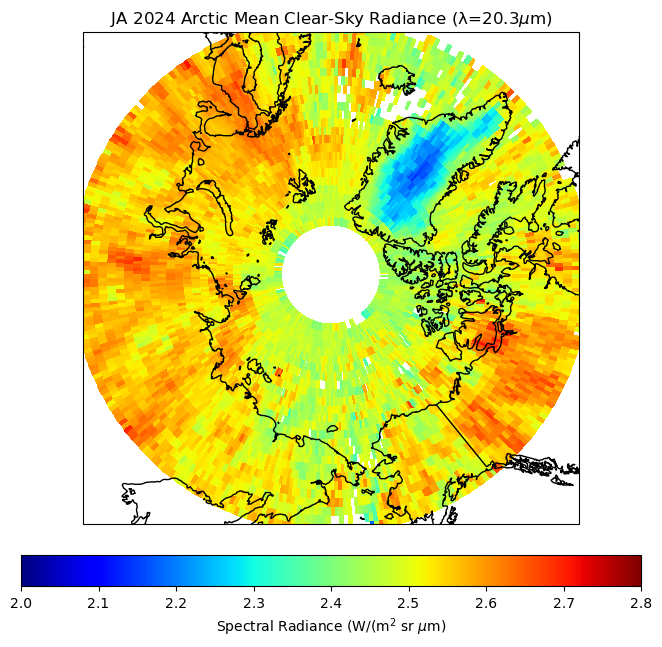

In [43]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['clear_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=2.0, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Arctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

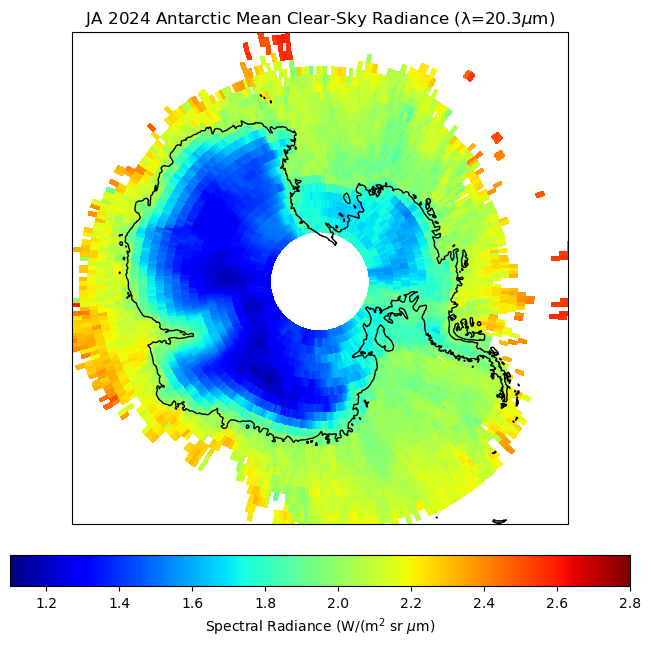

In [44]:
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['clear_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.1, vmax=2.8)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA 2024 Antarctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# DJF (DJF)

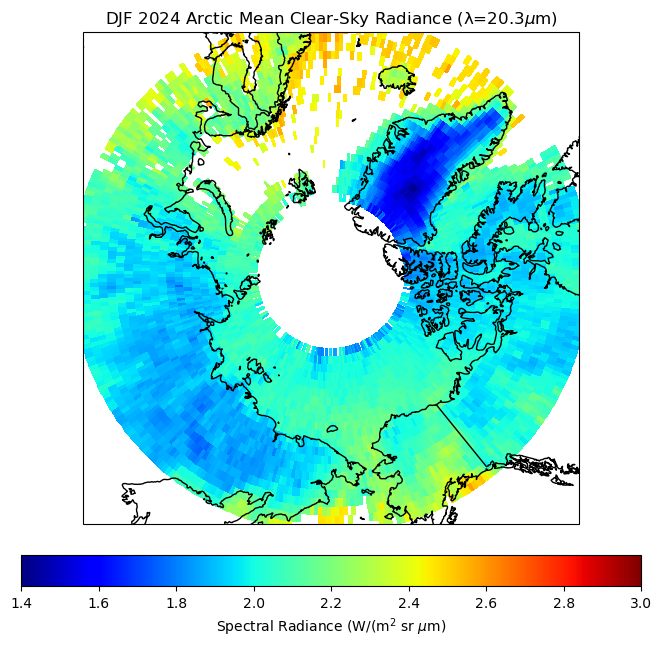

In [45]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['clear_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.4, vmax=3.0)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Arctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

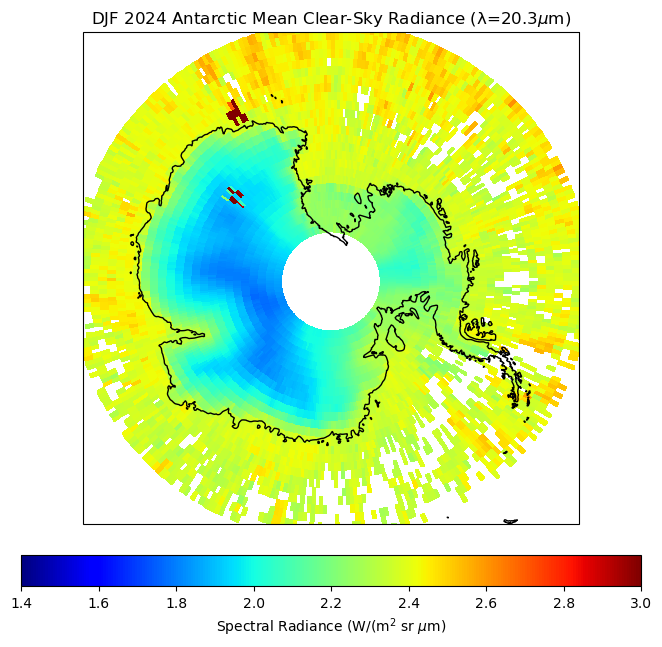

In [46]:
# now let's get some polar stereographic projections
spectral_radiance_test=winter_ds['clear_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='jet', vmin=1.4, vmax=3.0)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('DJF 2024 Antarctic Mean Clear-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# Summer-Winter

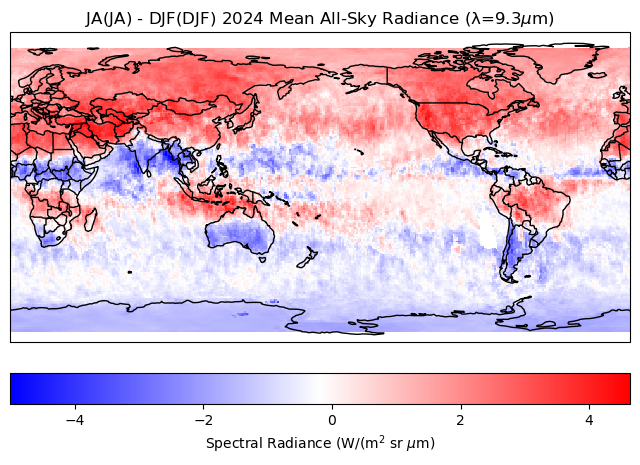

In [47]:
#just as a quick sanity check, let's make a spatial plot
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA(JA) - DJF(DJF) 2024 Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

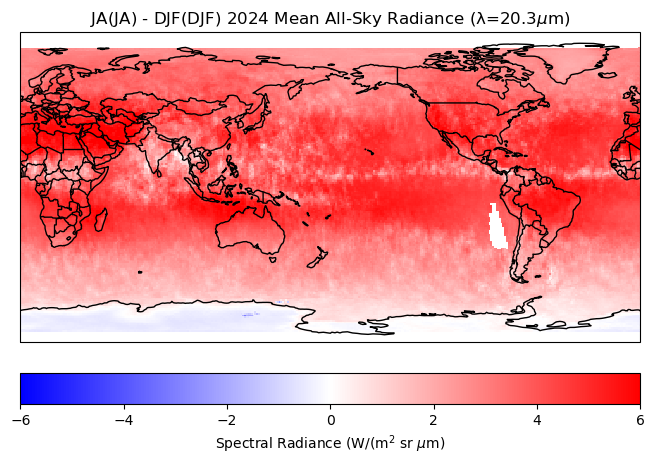

In [48]:
#just as a quick sanity check, let's make a spatial plot
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=summer_ds['latitude']
longitude=summer_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-6, vmax=6)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('JA(JA) - DJF(DJF) 2024 Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

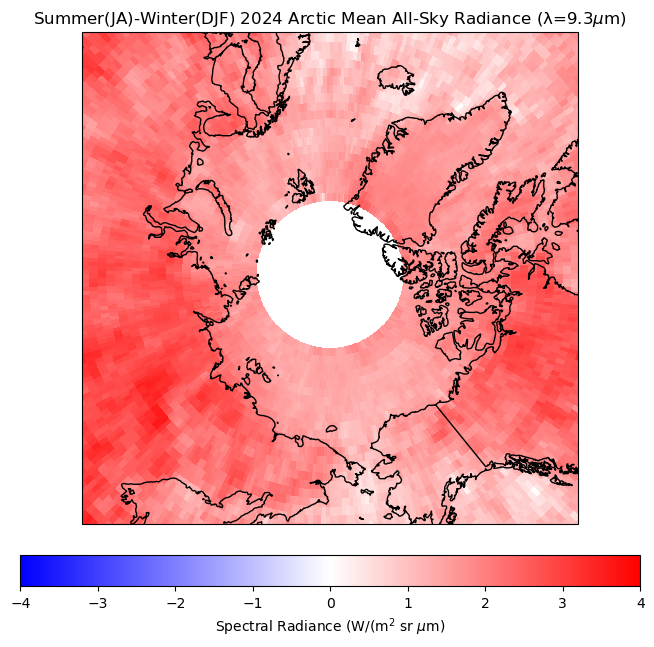

In [49]:
# let's do two more things today: let's plot these, then let's start looking at a temperature record of the arctic vs the antarctic to isolate what the radiance differences are from
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-4, vmax=4)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('Summer(JA)-Winter(DJF) 2024 Arctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

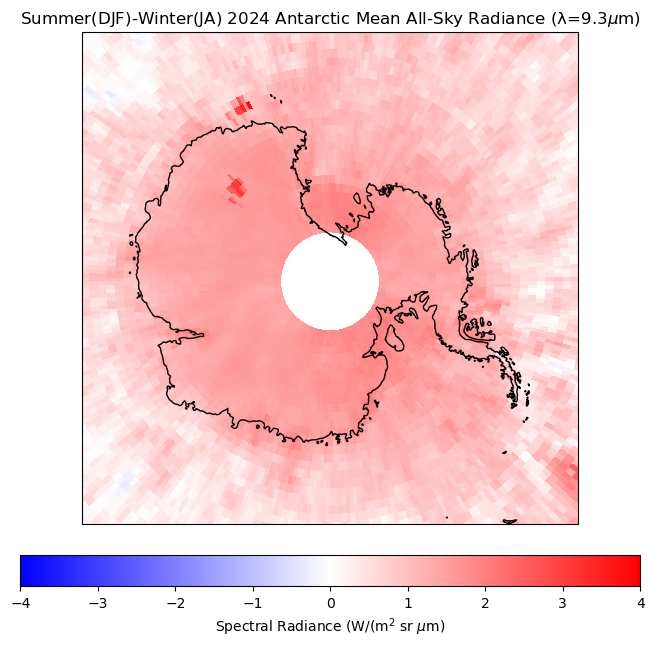

In [50]:
#READ_ME: I know the winter_ds and summer_ds look flipped, but winter is poorly named since it is just DJF and summer is JA
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-4, vmax=4)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('Summer(DJF)-Winter(JA) 2024 Antarctic Mean All-Sky Radiance (λ=9.3$\mu$m)')
plt.show()

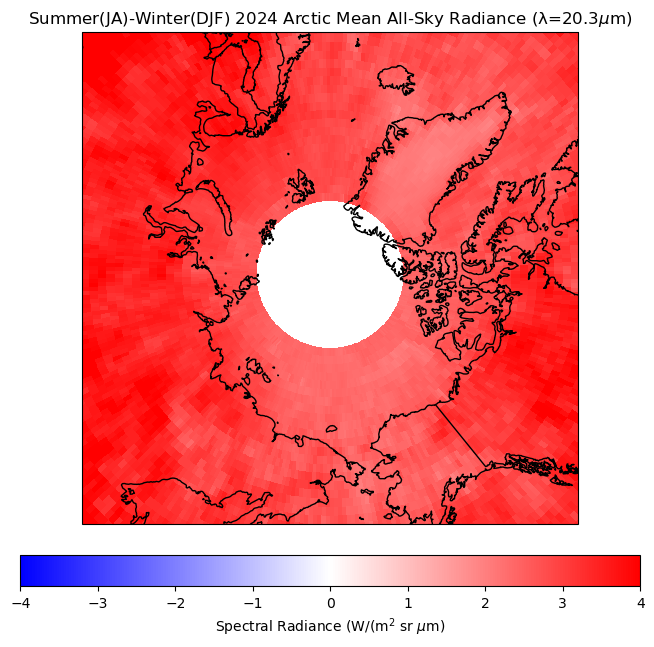

In [51]:
# let's do two more things today: let's plot these, then let's start looking at a temperature record of the arctic vs the antarctic to isolate what the radiance differences are from
# now let's get some polar stereographic projections
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-4, vmax=4)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('Summer(JA)-Winter(DJF) 2024 Arctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

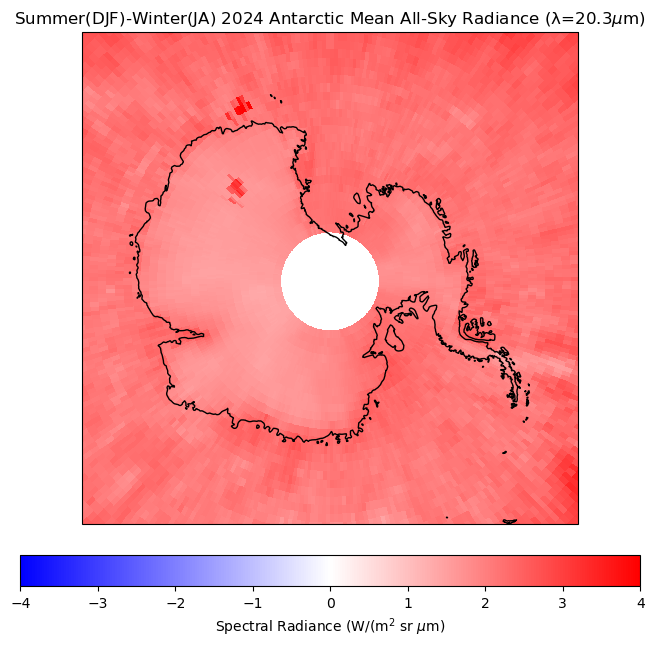

In [52]:
#READ_ME: I know the winter_ds and summer_ds look flipped, but winter is poorly named since it is just DJF and summer is JA
spectral_radiance_test=winter_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=9)-summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type']).sel(spectral=22)
latitude=winter_ds['latitude']
longitude=winter_ds['longitude']

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
#ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, spectral_radiance_test.values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-4, vmax=4)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Spectral Radiance (W/(m$^2$ sr $\mu$m)')

plt.title('Summer(DJF)-Winter(JA) 2024 Antarctic Mean All-Sky Radiance (λ=20.3$\mu$m)')
plt.show()

# Revisit these plots if you find them useful, because the plotting code needs work

In [53]:
# the x-axis should be the wavelength while the y-axis is the latitude and the z-axis (colorbar) is the radiance
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type','lon'])
latitude=summer_ds['latitude']
wavelength=summer_ds['wavelength'].sel(xtrack=0)
print(spectral_radiance_test.shape)

(63, 168)


Text(0, 0.5, 'Latitude')

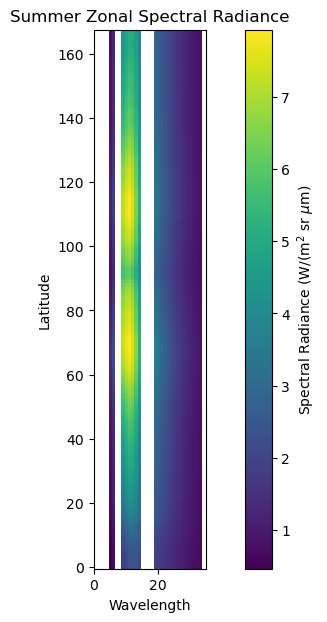

In [54]:
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type','lon'])
plt.figure(figsize=(10, 7))  # 8 inches wide, 6 inches tall
plt.imshow(spectral_radiance_test.T, cmap='viridis', origin='lower') #spectral_radiance_test is transposed to get the axies in the right order
# Add a colorbar
plt.colorbar(label='Spectral Radiance (W/(m$^2$ sr $\mu$m)')
# Add labels and title
plt.xlim(0,35)
plt.title('Summer Zonal Spectral Radiance')
plt.xlabel('Wavelength')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

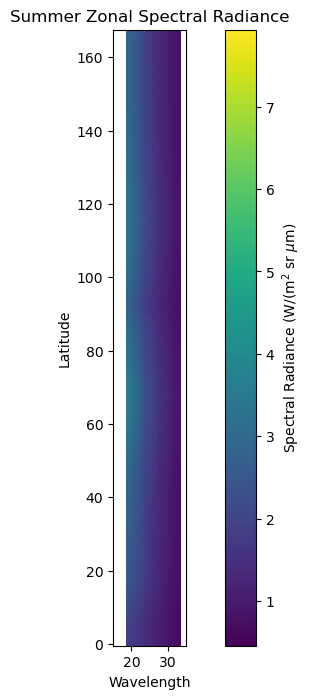

In [55]:
spectral_radiance_test=summer_ds['all_sky_radiance'].mean(['xtrack','sfc_type','lon'])
#plt.figure(figsize=(10, 7))  # 8 inches wide, 6 inches tall
#cax = ax.imshow(data, cmap='plasma', origin='lower')
#fig.colorbar(cax, ax=ax)
fig, ax = plt.subplots(figsize=(10, 8))  # Larger size
cax=ax.imshow(spectral_radiance_test.T, cmap='viridis', origin='lower') #spectral_radiance_test is transposed to get the axies in the right order
# Add a colorbar
fig.colorbar(cax, ax=ax, label='Spectral Radiance (W/(m$^2$ sr $\mu$m)')
# Add labels and title
plt.xlim(15,35)
plt.title('Summer Zonal Spectral Radiance')
plt.xlabel('Wavelength')
plt.ylabel('Latitude')
